In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

1. Simple visualizations

The following shows the top 5 states that have the overall most alcohol-related fatalities:

In [23]:
fatalities = pd.read_csv('./fatalities.csv')
fatalities.sort_values(by='afatal', ascending=False, na_position='first').head(5)

,Unnamed: 0,state,year,spirits,unemp,income,emppopl,beertax,baptist,mormon,...,nfatal2124,afatal,popl,popl1517,popl1820,popl2124,milestot,unempus,emppoplus,gsp
280,281,tx,1982,1.56,6.9,13942.720703,62.655109,0.433174,18.204901,0.52540,...,228,2094.899902,15374004.0,7.670002e+05,8.424192e+05,1186999.250,125218.0,9.7,57.799999,-0.016066
282,283,tx,1984,1.48,5.9,14039.560547,64.555862,0.418846,17.722900,0.55210,...,224,1852.469971,16083013.0,7.489994e+05,8.447065e+05,1188999.375,137737.0,7.5,59.500004,0.049232
281,282,tx,1983,1.48,8.0,13692.660156,62.316143,0.416284,17.962299,0.53860,...,208,1812.500000,15816016.0,7.590008e+05,8.435621e+05,1196000.750,131883.0,9.6,57.900002,-0.002561
283,284,tx,1985,1.37,7.0,14270.126953,63.912521,0.461441,17.486700,0.56600,...,174,1471.020020,16370022.0,7.509996e+05,8.458525e+05,1175001.000,143263.0,7.2,60.100002,0.025227
26,27,ca,1987,1.78,5.8,17846.000000,63.074295,0.090000,1.782100,1.62608,...,199,1431.569946,27663018.0,1.163001e+06,1.268013e+06,1753999.750,226301.0,6.2,61.500000,0.069736


The following shows the top 5 states that have the overall fewest alcohol-related fatalities

In [24]:
fatalities.sort_values(by='afatal', ascending=True, na_position='first').head(5)

,Unnamed: 0,state,year,spirits,unemp,income,emppopl,beertax,baptist,mormon,...,nfatal2124,afatal,popl,popl1517,popl1820,popl2124,milestot,unempus,emppoplus,gsp
254,255,ri,1984,2.06,5.3,14312.087891,62.533695,0.160440,0.1000,0.100000,...,5,24.600000,961995.12500,43000.027344,53910.625000,72000.070312,5300.000000,7.5,59.500004,0.074032
253,254,ri,1983,2.13,8.3,13759.173828,59.183674,0.167431,0.1000,0.100000,...,7,27.530001,955995.50000,43999.882812,54892.109375,74000.078125,6014.000000,9.6,57.900002,0.045932
294,295,vt,1982,2.39,6.9,12064.439453,63.565891,0.711515,0.1067,0.281400,...,6,27.760000,520000.59375,26000.025391,32127.525391,42000.039062,3993.000000,9.7,57.799999,0.000128
44,45,de,1984,2.57,6.2,14925.274414,62.419010,0.159341,0.7000,0.200000,...,8,28.680000,614001.12500,29000.007812,35359.277344,47000.015625,5138.000000,7.5,59.500004,0.052361
271,272,sd,1987,1.50,4.2,12545.000000,66.019417,0.609253,0.8225,0.336268,...,4,30.040001,708998.50000,30999.941406,35000.035156,41999.992188,6208.999512,6.2,61.500000,-0.033471


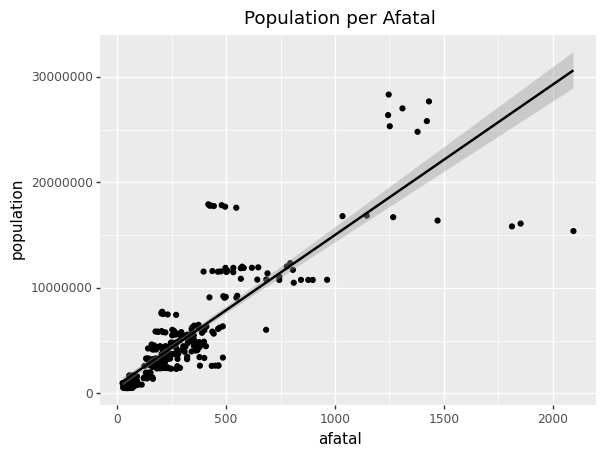

<ggplot: (-9223372036551339527)>

In [19]:
ggplot(fatalities, aes(x='afatal', y='popl')) + geom_point() + labs(title = "Population per Afatal", y = "population") + geom_smooth(method='lm')

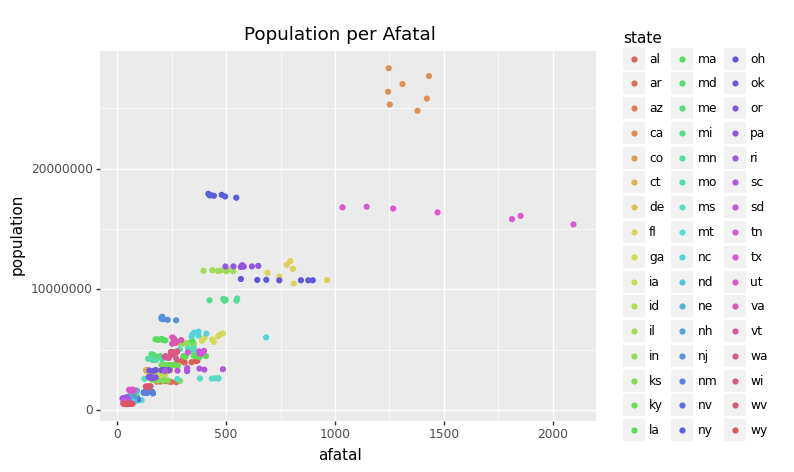

<ggplot: (293587983)>

In [4]:
ggplot(fatalities, aes(x='afatal', y='popl', color = "state")) + geom_point() + labs(title = "Population per Afatal", y = "population")

Most states follow the positive correlation between population and afatals. Several states stand out as outliers. Factoring by color reveals the states as New York having a higher population but lower afatals per capita than the linear model, California having very high population but slightly lower afals per capita, and Texas having high population but higher afals per capita.

Below shows smaller dataframe of only the outlier states that verify the statement, if the colors in the graph above cannnot distinguish the states. All 3 states show decreasing fatalities over the years from 1982 to 1988, with Texas being the most improved in reduction of afatals per capita.

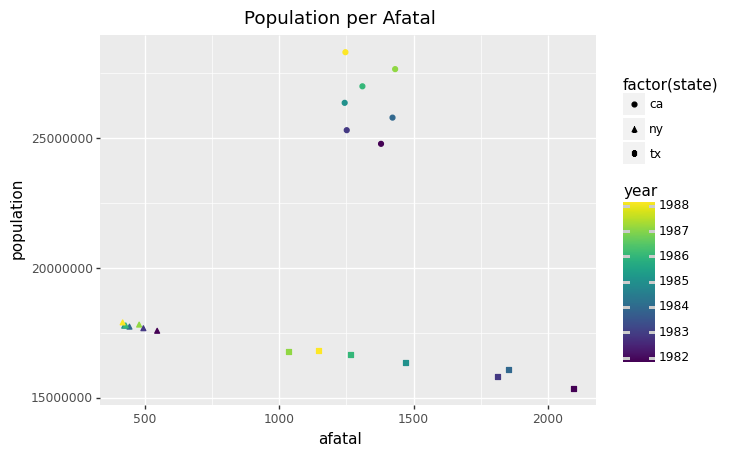

<ggplot: (-9223372036552498772)>

In [5]:
fatalitiesOutliers = fatalities.loc[(fatalities['state'] == 'ca')]
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'tx')])
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'ny')])
ggplot(fatalitiesOutliers, aes(x='afatal', y='popl', shape = "factor(state)", color = "year")) + geom_point() + labs(title = "Population per Afatal", y = "population")

factoring by year and displaying their respective linear models shows a general trend of decreased afatals per capita.

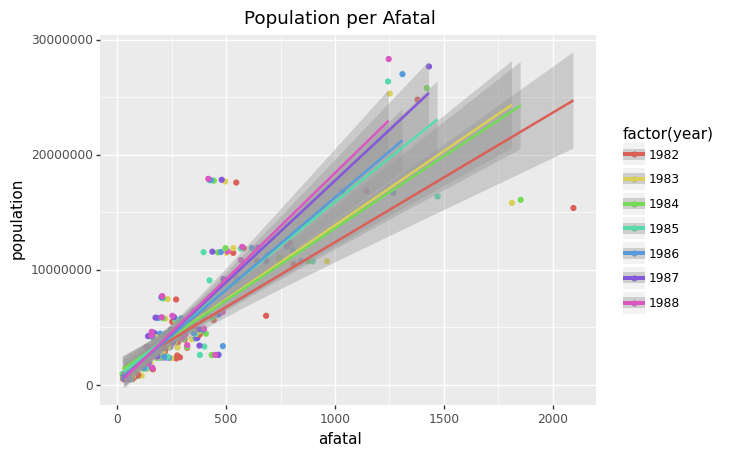

<ggplot: (-9223372036552498870)>

In [6]:
ggplot(fatalities, aes(x='afatal', y='popl', color = "factor(year)")) + geom_point() + labs(title = "Population per Afatal", y = "population") + geom_smooth(method='lm')

Looking at the linear model of miles per afatal, there is no positive nor negative correlation between miles and afatals. It seems that miles is not related to afatals:

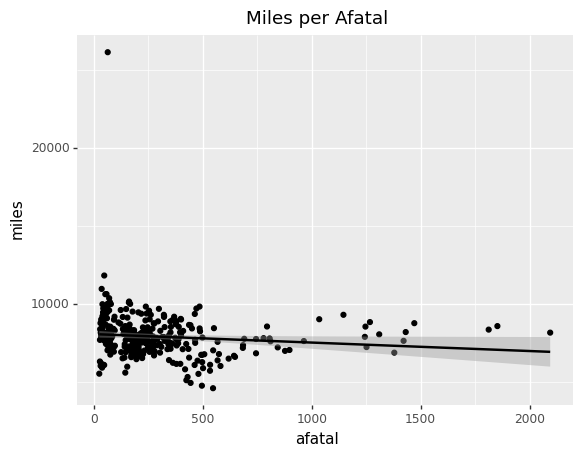

<ggplot: (302281690)>

In [7]:
ggplot(fatalities, aes(x='afatal', y='miles')) + geom_point() + labs(title = "Miles per Afatal", y = "miles") + geom_smooth(method='lm')

Factoring by state reveals that Texas, California, Ohio, and Florida are on the high end of the spectrum of afatal per mile. New York, by contrast, is not an outlier. Nebraska seemed to have had a spectacular year, having nearly 30k miles with only about 100 fatalities.

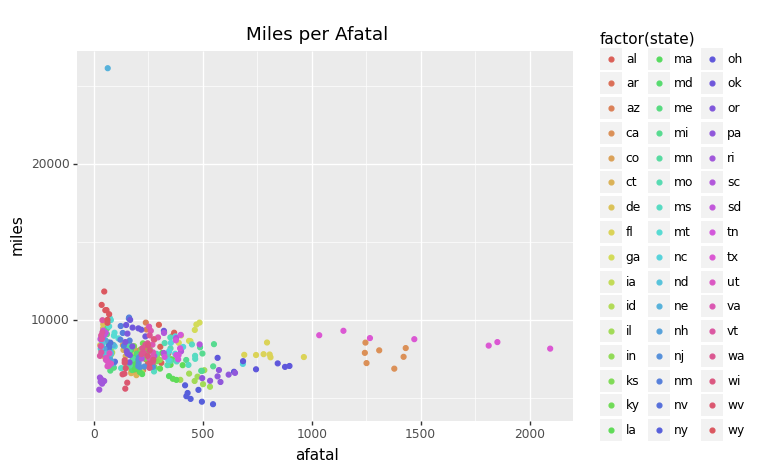

<ggplot: (-9223372036552357025)>

In [8]:
ggplot(fatalities, aes(x='afatal', y='miles', color = "factor(state)")) + geom_point() + labs(title = "Miles per Afatal", y = "miles")

A simplified dataframe of only the aformentioned states is below for clearer viewing:

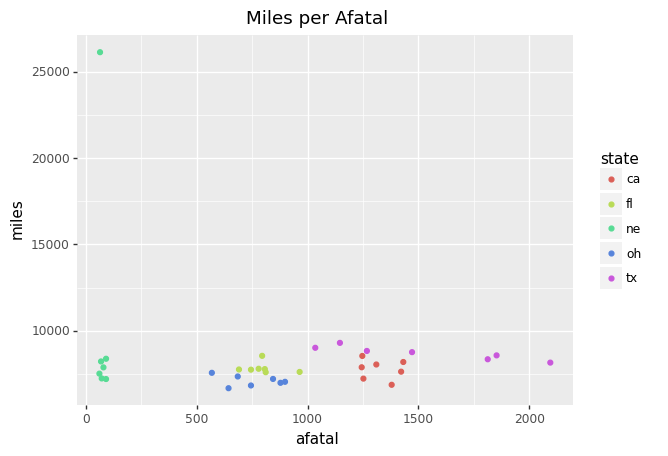

<ggplot: (-9223372036552351151)>

In [9]:
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'fl')])
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'oh')])
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'ne')])
fatalitiesOutliers = fatalitiesOutliers[~fatalitiesOutliers.state.str.contains("ny")]

ggplot(fatalitiesOutliers, aes(x='afatal', y='miles', color = "state")) + geom_point() + labs(title = "Miles per Afatal", y = "miles")

If we add year to the plot, we can see that fatalities per mile is decreasing over the years. We no longer have to look at Nebraska, as their fatalities are so few to begin with.

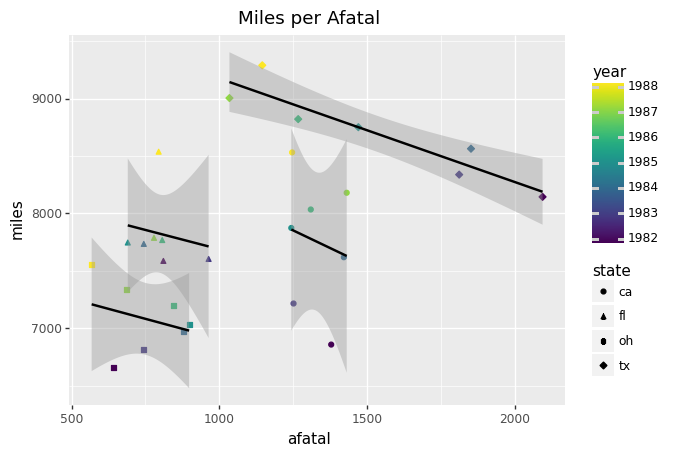

<ggplot: (302426828)>

In [10]:
fatalitiesOutliers = fatalitiesOutliers[~fatalitiesOutliers.state.str.contains("ne")]
ggplot(fatalitiesOutliers, aes(x='afatal', y='miles', color = "year", shape = 'state')) + geom_point() + labs(title = "Miles per Afatal", y = "miles") + geom_smooth(method='lm')

If we apply the linear model to all states, we can see over the years similar patterns of decreasing fatalities per mile, or rather, increasing number of miles per fatality, however you wish to look at it.

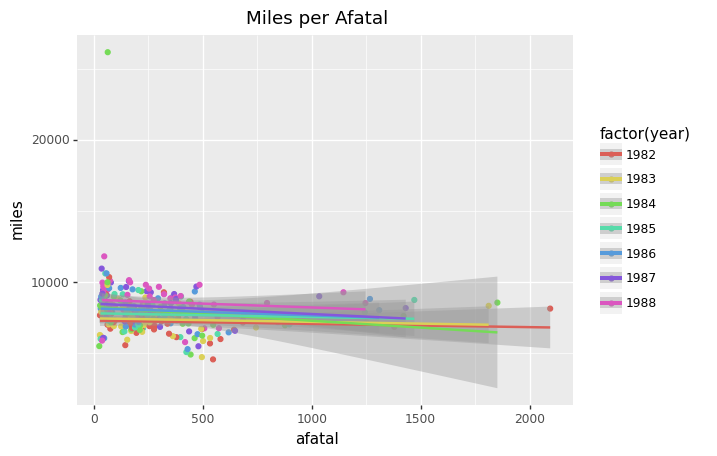

<ggplot: (293587997)>

In [11]:
ggplot(fatalities, aes(x='afatal', y='miles', color = "factor(year)")) + geom_point() + labs(title = "Miles per Afatal", y = "miles") + geom_smooth(method='lm')

looking at the relationship between fatal and afatal, there is a positive relationship judging by the linear model.

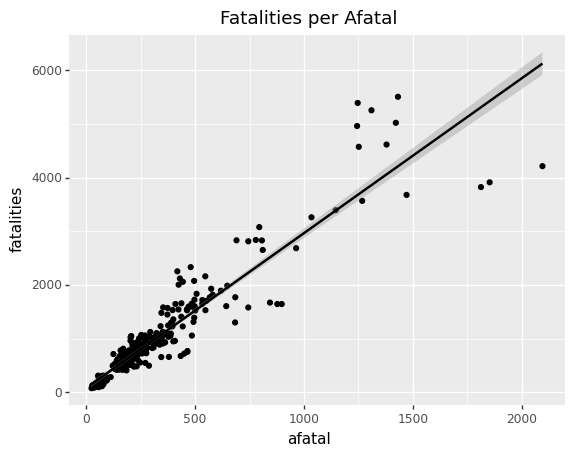

<ggplot: (302639322)>

In [12]:
ggplot(fatalities, aes(x='afatal', y='fatal')) + geom_point() + labs(title = "Fatalities per Afatal", y = "fatalities") + geom_smooth(method='lm')

When attempting to identify the outliers by state, it looks like California, Texas, Florida, and New York are our usual culprits again. California, New York, and Florida has fewer afatals per fatal, while Ohio and Texas just seem too drunk for their own good.

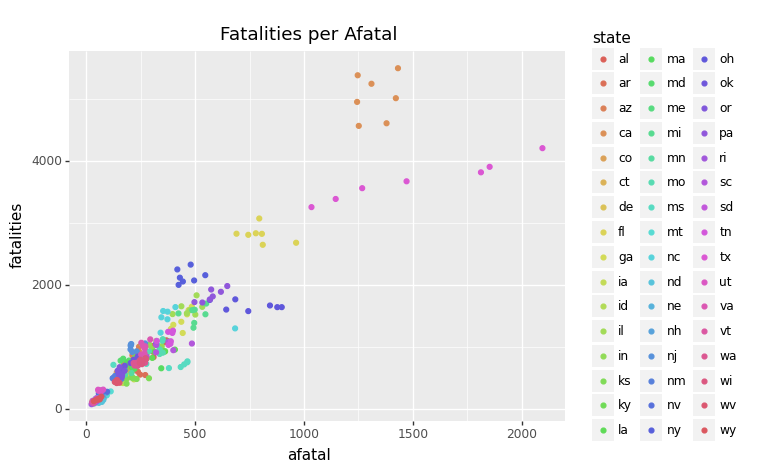

<ggplot: (302344617)>

In [13]:
ggplot(fatalities, aes(x='afatal', y='fatal', color = 'state')) + geom_point() + labs(title = "Fatalities per Afatal", y = "fatalities")

A plot of only the identified outliers below, with years being distinguished. Again, it looks like the afatals per fatal seems to be decreasing over the years.

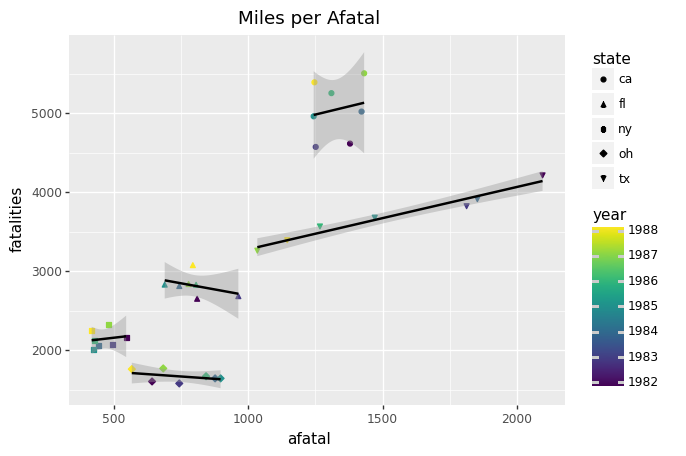

<ggplot: (-9223372036552140221)>

In [14]:
fatalitiesOutliers = fatalitiesOutliers.append(fatalities.loc[(fatalities['state'] == 'ny')])
ggplot(fatalitiesOutliers, aes(x='afatal', y='fatal', shape = "state", color = "year")) + geom_point() + labs(title = "Miles per Afatal", y = "fatalities") + geom_smooth(method='lm')

If we apply the linear model to all states, we can see similar patterns of decreasing afatals per fatal over the years, or rather, increasing number of fatals per afatal, however you wish to look at it.

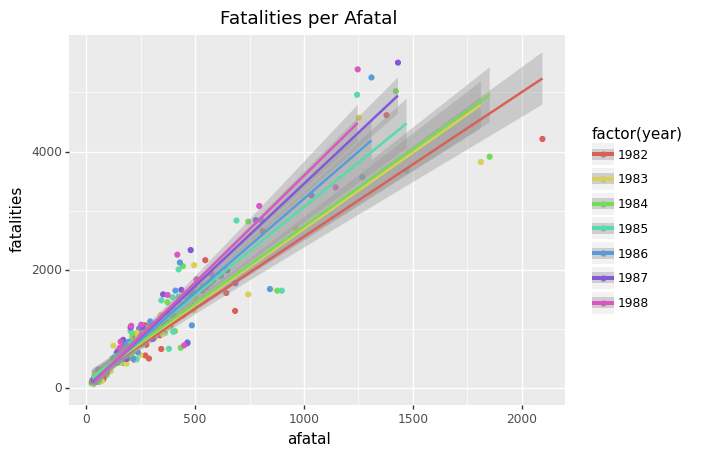

<ggplot: (-9223372036551983153)>

In [15]:
ggplot(fatalities, aes(x='afatal', y='fatal', color = 'factor(year)')) + geom_point() + labs(title = "Fatalities per Afatal", y = "fatalities") + geom_smooth(method = "lm")